# Morphology data analysis based on TEI types

In [1]:
from statistics import mean

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

## 1 &emsp; Data collection and transformation

Data from previous year research:

In [3]:
df_path = "." + os.sep + "data" + os.sep + "csv" + os.sep + "2018_annotated_dirs.csv"
df = pd.read_csv(df_path, sep=";")
df.head()

,Text,TEI type,ADJ,ADVB,INTJ,NOUN,PREP,VERB
0,"«да куда ж он делся-то, господи?»",setting,0.000000,0.000000,0.0,0.181818,0.000000,0.090909
1,"«дома, что ли-ча, лазарь?»",setting,0.000000,0.000000,0.0,0.200000,0.000000,0.000000
2,"автор опять испуганно высовывается, но быстро ...",mixed,0.000000,0.166667,0.0,0.111111,0.055556,0.166667
3,автор хочет соединить руки коломбины и пьеро. ...,setting,0.142857,0.081633,0.0,0.285714,0.081633,0.163265
4,аграфена кондратьевна и липочка (разряженная,modifier,0.000000,0.000000,0.0,0.500000,0.000000,0.000000


Now, let's leave out the `Text` column:

In [4]:
df.drop(["Text"], axis=1, inplace=True)
df.head()

,TEI type,ADJ,ADVB,INTJ,NOUN,PREP,VERB
0,setting,0.000000,0.000000,0.0,0.181818,0.000000,0.090909
1,setting,0.000000,0.000000,0.0,0.200000,0.000000,0.000000
2,mixed,0.000000,0.166667,0.0,0.111111,0.055556,0.166667
3,setting,0.142857,0.081633,0.0,0.285714,0.081633,0.163265
4,modifier,0.000000,0.000000,0.0,0.500000,0.000000,0.000000


All the options for parts of speech and TEI types:

In [5]:
pos_list = df.columns.values[1:].tolist()
tei_types = df["TEI type"].unique().tolist()

data_mean = {str(tei): [] for tei in tei_types}
print("POS: {}\nTypes: {}".format(pos_list, tei_types))

POS: ['ADJ', 'ADVB', 'INTJ', 'NOUN', 'PREP', 'VERB']
Types: ['setting', 'mixed', 'modifier', 'exit', 'entrance', 'business', 'delivery', 'location']


For each TEI type, we collect mean shares of particular part of speech:

In [6]:
for dir_type in data_mean.keys():
    print("Collecting means for type {}".format(dir_type.upper()))
    type_list = []
    for pos in pos_list:
        pos_thistype_mean = mean(df[df["TEI type"] == dir_type][pos])
        print("\t {:>4}={:.4f}".format(pos, pos_thistype_mean))
        data_mean[dir_type].append(pos_thistype_mean)

	  ADJ=0.1007
	 ADVB=0.0361
	 INTJ=0.0019
	 NOUN=0.4045
	 PREP=0.1088
	 VERB=0.1010
	  ADJ=0.0805
	 ADVB=0.0496
	 INTJ=0.0000
	 NOUN=0.2677
	 PREP=0.1043
	 VERB=0.1841
	  ADJ=0.1863
	 ADVB=0.0131
	 INTJ=0.0000
	 NOUN=0.3836
	 PREP=0.0247
	 VERB=0.0104
	  ADJ=0.0776
	 ADVB=0.0243
	 INTJ=0.0000
	 NOUN=0.2727
	 PREP=0.1252
	 VERB=0.3455
	  ADJ=0.0495
	 ADVB=0.0284
	 INTJ=0.0000
	 NOUN=0.3829
	 PREP=0.1023
	 VERB=0.2831
	  ADJ=0.0368
	 ADVB=0.0303
	 INTJ=0.0013
	 NOUN=0.2874
	 PREP=0.1017
	 VERB=0.3064
	  ADJ=0.0670
	 ADVB=0.1462
	 INTJ=0.0000
	 NOUN=0.3400
	 PREP=0.1476
	 VERB=0.0973
	  ADJ=0.0000
	 ADVB=0.0000
	 INTJ=0.0000
	 NOUN=0.4667
	 PREP=0.4667
	 VERB=0.0000


In [7]:
df_type_pos_mean = pd.DataFrame(data_mean, index=pos_list)
df_type_pos_mean.head()

,setting,mixed,modifier,exit,entrance,business,delivery,location
ADJ,0.100709,0.080525,0.186304,0.077564,0.049487,0.036796,0.067012,0.000000
ADVB,0.036124,0.049584,0.013084,0.024328,0.028424,0.030317,0.146164,0.000000
INTJ,0.001914,0.000000,0.000000,0.000000,0.000000,0.001343,0.000000,0.000000
NOUN,0.404520,0.267684,0.383555,0.272680,0.382882,0.287393,0.339978,0.466667
PREP,0.108811,0.104325,0.024747,0.125224,0.102281,0.101711,0.147632,0.466667


## 2 &emsp; Interpretation

### 2.1 &emsp; Which parts of speech are used in different TEI types?

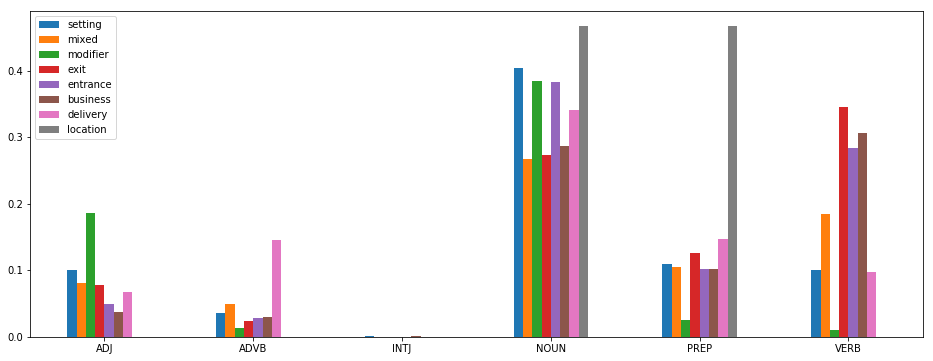

In [8]:
df_type_pos_mean.plot.bar(rot=0, figsize=(16, 6))

**Conclusions**

- `PREP` (prepositions) `> all other POS` => `location` or `setting` (_в комнате_, _на столе_, _на сцене_, etc.)

- `NOUN` \~ `PREP` => `location`

- `ADVB` (adverbs) `> all other POS` => `delivery` (_громко_, _говорит шёпотом_)

- `ADJ` (adjectives) `> 0.1` => `modifier` (_красивая девушка_)

- `VERB` predominance => active types (`business`, `entrance`, or `exit`)

### 2.2 &emsp; Which TEI types use which parts of speech?

…which basically means that we're just "switching" the axes — that is, transposing the dataframe and plotting it as a bar plot.

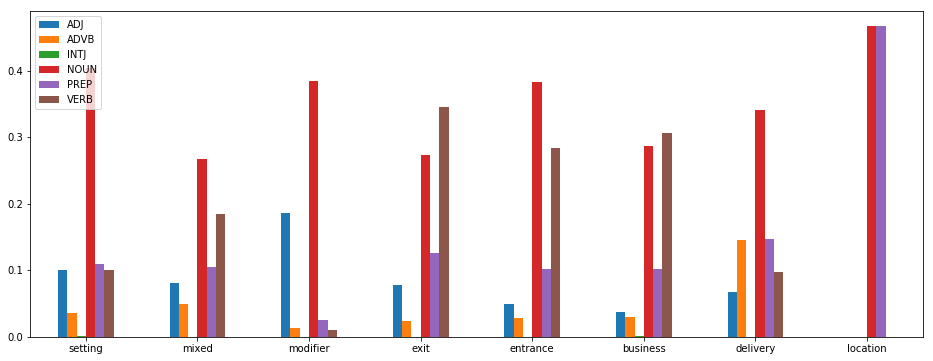

In [9]:
df_type_pos_mean.transpose().plot.bar(rot=0, figsize=(16, 6))

**Conclusions:**

- if `NOUN = PREP`, it is definitely `location`

- `ADVB > 0,1` => Check for `delivery` type

- a lot of verbs? Might be `entrance`, `exit` or `delivery` <br />
(`delivery` may be explained by _кричит_  and others; apart from that, participles and adverbial participles (say, _плача_) are also parsed as verbs)